In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import scipy.stats as st

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [27]:
income_df = pd.read_csv("resources/income_median.csv")
rent_df = pd.read_csv("resources/rent_median.csv")
mortgage_df = pd.read_csv("resources/mortgage_median.csv")
perth_median_income_df= pd.read_csv("resources/greater_perth_income.csv")
unemployment_df = pd.read_csv("resources/unemployment_rate.csv")
unoccupied_df = pd.read_csv("resources/unoccupied_rate.csv")
building_df = pd.read_csv("resources/building_approval.csv")

merged_data = 'resources/affordability.csv'
pd.set_option('display.max_columns', None)
aff_df = pd.read_csv(merged_data)
aff_df.head()



,Unnamed: 0,SA2 Name,median_income of suburb,median_rent,median_mortgage_repayment,unemployment_rate,unoccupied_rate,yearly building_approval,Greater Perth median income,qualyfing_income(mortgage),affordability_index(mortgage),qualyfing_income(rent),affordability_index(rent)
0,0,Dawesville - Bouvard,1584.677419,358.955224,467.842236,0.106252,0.263536,136.0,2333.167481,1559.474120,149.612453,1196.517413,194.996534
1,1,Falcon - Wannanup,1486.918605,342.460317,443.090411,0.104274,0.314557,105.0,2333.167481,1476.968037,157.970073,1141.534392,204.388716
2,2,Greenfields,1192.934783,306.119792,359.553526,0.129066,0.118692,20.0,2333.167481,1198.511754,194.672057,1020.399306,228.652398
3,3,Halls Head - Erskine,1627.840909,360.374494,454.794521,0.095285,0.198820,195.0,2333.167481,1515.981735,153.904722,1201.248313,194.228575
4,4,Mandurah,1189.174107,290.353881,355.846222,0.140815,0.284392,111.0,2333.167481,1186.154073,196.700204,967.846271,241.067983


In [37]:
perth_median_icnome = perth_median_income_df["Median"].values[0]

In [38]:
df_0 = pd.merge(income_df,rent_df,on="SA2 Name", how="inner")
df_1 = pd.merge(df_0, mortgage_df, on="SA2 Name", how="inner") 
df_2 = pd.merge(df_1, unemployment_df, on="SA2 Name", how="inner") 
df_3 = pd.merge(df_2, unoccupied_df, on="SA2 Name", how="inner") 
combine_all_df = pd.merge(df_3, building_df, on="SA2 Name", how="inner") 
combine_all_df

,Unnamed: 0_x,SA2 Name,Median_x,Unnamed: 0_y,Median_y,Unnamed: 0_x,Median,weekly repayment(median),Unnamed: 0_y,unemployment_rate,Unnamed: 0_x,unoccupied_rate,Unnamed: 0_y,building_approval
0,0,Dawesville - Bouvard,1584.677419,0,358.955224,0,2032.885906,467.842236,0,0.106252,0,0.263536,0,136.0
1,1,Falcon - Wannanup,1486.918605,1,342.460317,1,1925.333333,443.090411,1,0.104274,1,0.314557,1,105.0
2,2,Greenfields,1192.934783,2,306.119792,2,1562.345679,359.553526,2,0.129066,2,0.118692,2,20.0
3,3,Halls Head - Erskine,1627.840909,3,360.374494,3,1976.190476,454.794521,3,0.095285,3,0.198820,3,195.0
4,4,Mandurah,1189.174107,4,290.353881,4,1546.236559,355.846222,4,0.140815,4,0.284392,4,111.0
5,5,Mandurah - East,1476.485149,5,340.357143,5,1974.137931,454.322154,5,0.102804,5,0.244487,5,66.0
6,6,Mandurah - North,1882.899628,6,371.546053,6,2040.480962,469.590139,6,0.095283,6,0.123564,6,333.0
7,7,Mandurah - South,1272.465438,7,303.422619,7,1691.304348,389.231686,7,0.122387,7,0.173436,7,123.0
8,8,Pinjarra,1475.806452,8,303.360215,8,1865.000000,429.205479,8,0.093875,8,0.099370,8,86.0
9,9,City Beach,3754.777070,9,774.324324,9,3645.569620,838.980406,9,0.053467,9,0.090873,9,22.0


In [40]:
suburb_df.columns =[["SA2 Name","median_income of suburb","median_rent","median_mortgage_repayment","unemployment_rate","unoccupied_rate","yearly building_approval"]]

NameError: name 'suburb_df' is not defined

In [41]:
suburb_df["Greater Perth median income"] = perth_median_icnome
suburb_df

NameError: name 'suburb_df' is not defined

In [ ]:
suburb_df["qualyfing_income(mortgage)"] = suburb_df.iloc[:,3] / 0.3
suburb_df["affordability_index(mortgage)"] = suburb_df.iloc[:,7] * 100 /  suburb_df.iloc[:,8]

In [ ]:
suburb_df["qualyfing_income(rent)"] = suburb_df.iloc[:,2] / 0.3
suburb_df["affordability_index(rent)"] = suburb_df.iloc[:,7] * 100 /  suburb_df.iloc[:,10]

In [ ]:
suburb_df

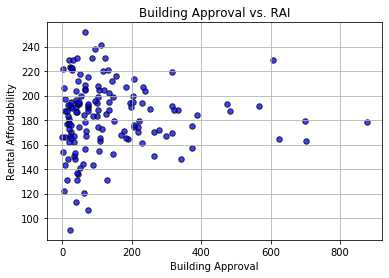

In [28]:
#Building Approval vs. RAI



plt.scatter(aff_df['yearly building_approval'],aff_df['affordability_index(rent)'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()

plt.title(f"Building Approval vs. RAI")
plt.xlabel('Building Approval')
plt.ylabel('Rental Affordability')

plt.savefig("building_vs.RAI.png")
plt.show()

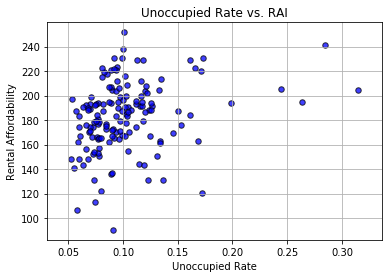

In [13]:
#Unoccupied vs. RAI



plt.scatter(aff_df['unoccupied_rate'],aff_df['affordability_index(rent)'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()

plt.title(f"Unoccupied Rate vs. RAI")
plt.xlabel('Unoccupied Rate')
plt.ylabel('Rental Affordability')

plt.savefig("Unoccupied Rate_vs.RAI.png")
plt.show()

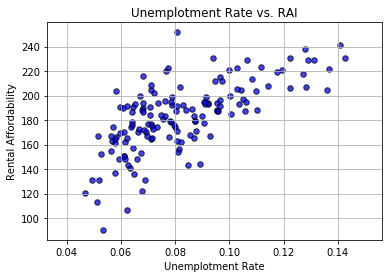

In [14]:
#Unemployment vs. RAI



plt.scatter(aff_df['unemployment_rate'],aff_df['affordability_index(rent)'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()

plt.title(f"Unemplotment Rate vs. RAI")
plt.xlabel('Unemplotment Rate')
plt.ylabel('Rental Affordability')

plt.savefig("Unemplotment Rate_vs.RAI.png")
plt.show()

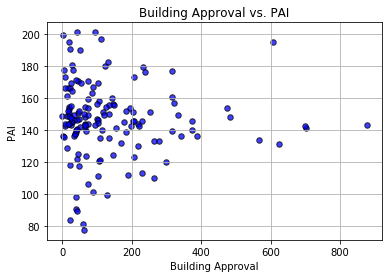

In [16]:
#Building Approval vs. PAI



plt.scatter(aff_df['yearly building_approval'],aff_df['affordability_index(mortgage)'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()

plt.title(f"Building Approval vs. PAI")
plt.xlabel('Building Approval')
plt.ylabel('PAI')

plt.savefig("building_vs.PAI.png")
plt.show()

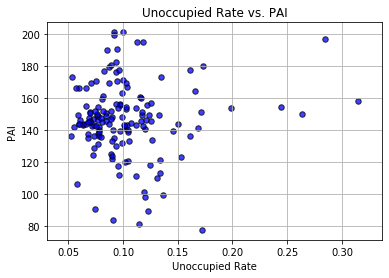

In [17]:
#Unoccupied vs. PAI



plt.scatter(aff_df['unoccupied_rate'],aff_df['affordability_index(mortgage)'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()

plt.title(f"Unoccupied Rate vs. PAI")
plt.xlabel('Unoccupied Rate')
plt.ylabel('PAI')

plt.savefig("Unoccupied Rate_vs.RAI.png")
plt.show()

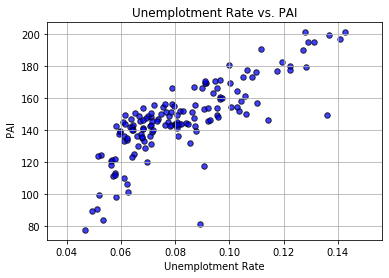

In [18]:
#Unemployment vs. PAI



plt.scatter(aff_df['unemployment_rate'],aff_df['affordability_index(mortgage)'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()

plt.title(f"Unemplotment Rate vs. PAI")
plt.xlabel('Unemplotment Rate')
plt.ylabel(' PAI')

plt.savefig("Unemplotment Rate_vs.PAI.png")
plt.show()

In [34]:
#Linear Regression

def create_linear_regression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(xdata, ydata)
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    print(f"The r-squared is: {rvalue}")

    plt.show()


In [35]:
aff_df.head()

,Unnamed: 0,SA2 Name,median_income of suburb,median_rent,median_mortgage_repayment,unemployment_rate,unoccupied_rate,yearly building_approval,Greater Perth median income,qualyfing_income(mortgage),affordability_index(mortgage),qualyfing_income(rent),affordability_index(rent)
0,0,Dawesville - Bouvard,1584.677419,358.955224,467.842236,0.106252,0.263536,136.0,2333.167481,1559.474120,149.612453,1196.517413,194.996534
1,1,Falcon - Wannanup,1486.918605,342.460317,443.090411,0.104274,0.314557,105.0,2333.167481,1476.968037,157.970073,1141.534392,204.388716
2,2,Greenfields,1192.934783,306.119792,359.553526,0.129066,0.118692,20.0,2333.167481,1198.511754,194.672057,1020.399306,228.652398
3,3,Halls Head - Erskine,1627.840909,360.374494,454.794521,0.095285,0.198820,195.0,2333.167481,1515.981735,153.904722,1201.248313,194.228575
4,4,Mandurah,1189.174107,290.353881,355.846222,0.140815,0.284392,111.0,2333.167481,1186.154073,196.700204,967.846271,241.067983


The r-squared is: 0.02617817372113006


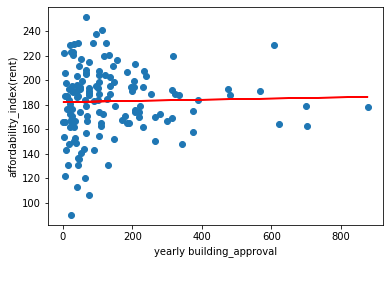

<Figure size 432x288 with 0 Axes>

In [36]:
xlbl = "yearly building_approval"
ylbl = "affordability_index(rent)"
lblpos = (50,25)

create_linear_regression(aff_df[xlbl],aff_df[ylbl],xlbl,ylbl,lblpos,5)

plt.savefig("linBR.png")